In [ ]:
import lattice
#%matplotlib widget
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np

# Generate new colormap for RSM display
rainbow = cm.get_cmap('rainbow', 256)
newcolors = rainbow(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
newcolors[:20, :] = white
newcmp = ListedColormap(newcolors)


ref1HKL = (3, 2, 0)
i1HKL = (0,0,1)
i2HKL = (1,-3,0)
oHKL = (3, 1, 0)
subMat = 'LAO'

map1 = lattice.lattice(ref1HKL, i2HKL, oHKL, subMat, geometry = 'hi_lo')
map1.load_sub()

#map2 = lattice.lattice(ref2HKL, i2HKL, oHKL, subMat, geometry = 'real')
#map2.load_sub()

In [ ]:
fig, ax = plt.subplots()


ValueError: XU.maplog: only negativ or zero values given. Log is not defined!

C:\Users\olive\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


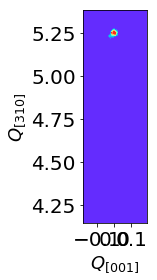

In [2]:
import matplotlib.pyplot as plt
import xrayutilities as xu
qPlot = rsmFile.plotQ( 140, 140, 4, 2, cmap='rainbow' )
#qPlot.colorbar('intensity')
cl = plt.contour(rsmFile.gridder.xaxis, rsmFile.gridder.yaxis, xu.utilities.maplog( xu.math.Gauss2d(rsmFile.gridder.xmatrix, rsmFile.gridder.ymatrix, *rsmFile.p), 4, 0).T, 8, colors='k', linestyles='solid')

In [4]:
%matplotlib widget
ax = (rsmFile.plot2d( cmap='rainbow' ))
#ax2 = (rsmFile.plotQ(60,60))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
bcl, bparams, bcov = rsmFile.fit_zoom_peak(ax)
print('Peak centre is at omega = ' + str(bparams[0]) + ', 2theta = ' + str(bparams[1]) +  '. ')
print('Sigma_om = ' + str(bparams[2]) + ', and Sigma_tt = ' + str(bparams[3]) + '. ')



[37.9936, 41.9836, 61.0, 82.48]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 96078 but corresponding boolean dimension is 717

In [46]:
%matplotlib widget

fig, ax = plt.subplots( )
#plt.figure(figsize=(1,1))
fig, ax = map1.plotQ(100, 100, 3.8, 2.5, nlev=100, fig=fig, ax=ax, cmap=newcmp)
#fig.set_size_inches(1, 3, forward=True)
ax.set_title(map1.filename)
ax.set_aspect(1)
#fig.set_dpi(200)
#plt.savefig('figure.png', bbox_inches='tight')
##fig1.tight_layout()
#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
#b.set_xlim(-0.11,0.11)
#b.set_ylim(4.18, 5.35)

#ax.set_adjustable('box-forced')

#for maps in plt.colormaps():
#    b = rsmFile.plotQ(60, 60, 2.8, 2, cmap=maps)
#    plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
bcl, bparams, bcov = rsmFile.fit_zoom_Qpeak(b)

print('Peak centre is at Qx = ' + str(bparams[0]) + ', Qz = ' + str(bparams[1]) +  '. ')
print('Sigma_om = ' + str(bparams[2]) + ', and Sigma_tt = ' + str(bparams[3]) + '. ')
bparams[2] = abs(bparams[2])
bparams[3] = abs(bparams[3])

[-0.11880320884287207, 0.12725523208065692, 4.869113450994323, 5.107102959392349]
------------- DEBUGGING -----------
QxGrid size = (19, 65)
QzGrid size = (19, 65)
cropData size = (19, 65)
fit params = [-2.54909426e-02  4.97516150e+00  2.58854448e-02  4.32811312e-02
  4.18977047e+00  6.60027358e-01  6.68406921e+05]
Peak centre is at Qx = -0.0254909426043463, Qz = 4.975161499700478. 
Sigma_om = 0.025885444792993914, and Sigma_tt = 0.04328113123299612. 


In [40]:
#from scipy.integrate import dblquad
print(str(bparams))
print(xu.math.functions.Gauss2dArea( *bparams ))

#f = xu.math.Gauss2d( bparams )
#dblquad(f, - np.inf, np.inf, - np.inf, np.inf)

[-2.54909426e-02  4.97516150e+00  2.58854448e-02  4.32811312e-02
  4.18977047e+00  6.60027358e-01  6.68406921e+05]
0.02949336564959637


In [22]:
import numpy as np
yminInd =  ( np.abs(rsmFile.gridder.yaxis[:] - b.get_ylim()[0]) ).argmin()
ymaxInd =  ( np.abs(rsmFile.gridder.yaxis[:] - b.get_ylim()[1]) ).argmin()
xminInd =  ( np.abs(rsmFile.gridder.xaxis[:] - b.get_xlim()[0]) ).argmin()
xmaxInd =  ( np.abs(rsmFile.gridder.xaxis[:] - b.get_xlim()[1]) ).argmin() 
cropQx = rsmFile.gridder.xaxis[xminInd:xmaxInd]
cropQz = rsmFile.gridder.yaxis[yminInd:ymaxInd]
print(cropQz.min())

fitRange = [rsmFile.gridder.xaxis[xminInd], rsmFile.gridder.xaxis[xmaxInd], rsmFile.gridder.yaxis[yminInd], rsmFile.gridder.yaxis[ymaxInd]]
print(fitRange)
#tupleIndex = np.unravel_index(np.argmax(self.gridder.data[yminInd:ymaxInd, xminInd:xmaxInd].flatten()), \
#             (len(self.gridder.data[yminInd:ymaxInd]), len(self.gridder.data[0, xminInd:xmaxInd])))
tupleIndex = np.unravel_index(np.argmax(rsmFile.gridder.data[xminInd:xmaxInd,yminInd:ymaxInd].flatten()), \
             (len(rsmFile.gridder.data[xminInd:xmaxInd, 0]), len(rsmFile.gridder.data[0,yminInd:ymaxInd])))


cropData = rsmFile.gridder.data[yminInd:ymaxInd, xminInd:xmaxInd]
#cropData = self.gridder.data[yminInd:ymaxInd, xminInd:xmaxInd]
cropQxGrid, cropQzGrid = np.meshgrid(cropQx, cropQz)

#xC = cropQxGrid[tupleIndex[0], tupleIndex[1]]
#yC = cropQzGrid[tupleIndex[0], tupleIndex[1]]
xC = cropQx[tupleIndex[0]]
yC = cropQz[tupleIndex[1]]
print(xC)
print(yC)
amp = rsmFile.gridder.data[tupleIndex]

xSigma = 0.1
ySigma = 0.1
angle = 0
background = 1
rsmFile.p = [xC, yC, xSigma, ySigma, amp, background, angle]
#print(rsmFile.gridder.xaxis.size)

xGrid, yGrid = np.meshgrid(rsmFile.gridder.xaxis, rsmFile.gridder.yaxis)

fitParams, cov = xu.math.fit.fit_peak2d(xGrid, yGrid, rsmFile.gridder.data.T, rsmFile.p, fitRange, xu.math.Gauss2d)

print('------------- DEBUGGING -----------')
print('QxGrid size = ' + str(cropQxGrid.shape))
print('QzGrid size = ' + str(cropQzGrid.shape))
print('cropData size = ' + str(cropData.shape))
print('fit params = ' + str(fitParams))
cl = b.contour( rsmFile.gridder.xaxis, rsmFile.gridder.yaxis, \
         np.log10(xu.math.Gauss2d( xGrid, \
         yGrid, *fitParams)), 8, colors='k', linestyles='solid')

5.144680250192037
[-0.08094806408540607, 0.06668700046871132, 5.144680250192037, 5.345092467790374]
0.002333254381019112
5.244886358991205
------------- DEBUGGING -----------
QxGrid size = (16, 39)
QzGrid size = (16, 39)
cropData size = (16, 39)
fit params = [-1.39318861e+00  1.04196270e+01 -3.18176077e+01 -2.07671906e+01
  9.66888269e+01  5.00031166e+01 -4.87693904e+07]


##### '''Get Omega rocking curve from RSM'''

In [84]:
om, omint, mask = xu.analysis.get_omega_scan([rsmFile.qy, rsmFile.qz], \
                                             rsmFile.data, [0, 4.3], 110, intrange=0.2, intdir='radial')


fig2, ax2 = plt.subplots()
ax2.plot(om, omint, label = 'RSM omega cut')


params, sd_params, itlim = xu.math.fit.gauss_fit(om, omint, iparams=[], maxit=300)

ax2.plot(om, xu.math.Gauss1d(om, *params), label='Gaussian fit')
ax2.legend()
ax2.set_xlabel('Omega (degrees)')
ax2.set_ylabel('intensity (a.u.)')
fwhm = xu.math.fit.fwhm_exp(om, xu.math.Gauss1d(om, *params))
print('FWHM = ' + str(fwhm))



FigureCanvasNbAgg()

FWHM = 0.463223128534068


angPlot = rsmFile.plot2d()

In [ ]:
qCentre = rsmFile.hxrd.Ang2Q( (bparams[0] - rsmFile.delta[0]), (bparams[1] - rsmFile.delta[1]) )
qSigma = rsmFile.hxrd.Ang2Q( bparams[2], bparams[3])

cl = b.contour(self.omega[0,xminInd:xmaxInd], self.tt[yminInd:ymaxInd,0], \
                 np.log10(xu.math.Gauss2d(self.omega[yminInd:ymaxInd, xminInd:xmaxInd], \
                 self.tt[yminInd:ymaxInd,xminInd:xmaxInd], *fitParams)), 8, colors='k', linestyles='solid')

In [ ]:
#import numpy as np
xminInd = (np.abs(rsmFile.omega - angPlot.get_xlim()[0])).argmin()
xmaxInd = (np.abs(rsmFile.omega - angPlot.get_xlim()[1])).argmin()
yminInd = (np.abs(rsmFile.tt[:,0] - angPlot.get_ylim()[0])).argmin()
ymaxInd = (np.abs(rsmFile.tt[:,0] - angPlot.get_ylim()[1])).argmin()
#tupleIndex = np.array(dims=2)
tupleIndex = np.unravel_index(np.argmax(rsmFile.data[yminInd:ymaxInd][xminInd:xmaxInd].flatten()), (len(rsmFile.data[xminInd:xmaxInd][0]), len(rsmFile.data[0][yminInd:ymaxInd])))
#tupleIndex = np.unravel_index( indexMax, (len(rsmFile.gridder.data[:,0]), len(rsmFile.gridder.data[0,:])) )
fitRange = [rsmFile.data[xminInd], rsmFile.data[xmaxInd], rsmFile.data[yminInd], rsmFile.data[ymaxInd]]


#cropX, cropY = np.meshgrid(cropX, cropY)
#xC = rsmFile.omega[tupleIndex[0]]
#yC = rsmFile.tt[tupleIndex[1]]
xSigma = 0.1
ySigma = 0.1
amp = rsmFile.data[tupleIndex]
angle = 0
background = 1
#p = [xC, yC, xSigma, ySigma, amp, background, angle]
bfoQy = 0
bfoQz = 4.440
#params = [bfoQy, bfoQz, 0.01, 0.01, rsmFile.data[xminInd:xmaxInd, yminInd:ymaxInd].max(), 0, 0.]
#gaussFit = xu.fitpeak2d(cropX.flatten(), cropY.flatten(), cropData.flatten(), p, drange=[cropX[0], cropX[-1], cropY[0], cropY[-1]], xu.math.functions.Gauss2d(cropX, cropY,))

#fitParams, cov = xu.math.fit.fit_peak2d(rsmFile.qy.flatten(), rsmFile.qz.flatten(), \
#                                        rsmFile.data.flatten(), params, fitRange, xu.math.Gauss2d)


In [ ]:
gaussFit = xu.math.functions.Gauss2d(rsmFile.gridder.xdata, rsmFile.gridder.ydata, *p)
fitParams, cov = xu.math.fit.fit_peak2d(rsmFile.gridder.xdata[xminInd:xmaxInd], rsmFile.gridder.ydata[yminInd:ymaxInd], cropData, p, drange=[34, 35, 67, 69], gaussFit)

In [ ]:
i = rsmFile.find_nearest(rsmFile.gridder.xaxis, qPlot.get_xlim()[0] )

In [ ]:
yminInd =  ( np.abs(rsmFile.tt[:,0] - angPlot.get_ylim()[0]) ).argmin()
ymaxInd =  ( np.abs(rsmFile.tt[:,0] - angPlot.get_ylim()[1]) ).argmin()
xminInd =  ( np.abs(rsmFile.omega[0, :] - angPlot.get_xlim()[0]) ).argmin()
xmaxInd =  ( np.abs(rsmFile.omega[0, :] - angPlot.get_xlim()[1]) ).argmin() 
#xminInd = np.unravel_index((np.asarray(rsmFile.omega) - angPlot.get_xlim()[0]), (len(rsmFile.omega[:][0]), len(rsmFile.omega[0][:])))

tfig, tax = plt.subplots(2)
cl = tax[0].contour(rsmFile.omega[0,xminInd:xmaxInd], rsmFile.tt[yminInd:ymaxInd,0], \
                 np.log10(xu.math.Gauss2d(rsmFile.omega[yminInd:ymaxInd, xminInd:xmaxInd], \
                 rsmFile.tt[yminInd:ymaxInd,xminInd:xmaxInd], *fitParams)), 8, colors='k', linestyles='solid')
p1 = tax[0].contourf( rsmFile.omega[0,xminInd:xmaxInd], rsmFile.tt[yminInd:ymaxInd,0], np.log10(rsmFile.data[yminInd:ymaxInd, xminInd:xmaxInd]) )

p2 = tax[1].contourf(rsmFile.omega[0,:], rsmFile.tt[:,0], np.log10(rsmFile.data))